In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-dark-palette','dark_background'])
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
data = pd.read_csv('transformed_housing_data_2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


## Scaling the dataset

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


## Train/Test set

In [6]:
X = data.drop(columns = ["Sale_Price"])
Y = data['Sale_Price']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [9]:
predictions = lr.predict(x_test)

In [10]:
lr.score(x_test, y_test)

0.846235554246878

# Forward selection

In [11]:
def adj_r2( m ,data_y, predictions):
  '''
  m : number of independent variables
  data_y : target variable
  predictions : prediction of the model to be evaluated

  Returns: Adjusted R2
  '''

  from sklearn.metrics import r2_score
  R = r2_score(data_y, predictions)
  n = len(data_y)
  adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
  return adj_R

In [12]:
def return_r2(X, Y, model):
  '''
  X : independent variables
  Y : target variable
  model : predictive model

  Returns: Adjusted R2 corresponding to the model
  '''
  model.fit(X, Y)
  pred = model.predict(X)
  m = len(X.columns)
  r2 = adj_r2(m, Y, pred)
  return r2

In [13]:
def forward_selection(model, X, Y, max_features):
  '''
  X : independent variables
  Y : target variable
  model : predictive model
  max_features : selects best feature upto max_features value

  Returns: 
  Rmax : Adjusted R2 of the final model
  history : list of Rmax at every new independent variable added to the model
  x[f_col] : best features upto max_features
  '''
  
  f_col = [] #stores the var being selected at each step of Forward Selection
  history = [] #stores the adj-R2 values whenever a new feature is added
  
  for i in range(max_features):

    f_col.append('blank')
    tmp = f_col[:]
    Rmax = -1

    for var in X.columns:
      tmp[-1] = var
      r2 = return_r2( X[tmp] , Y, model)
      if r2 >= Rmax:
        Rmax = r2
        f_col[-1] = var
        elim = var
  
    print("Selected",f_col[-1],"with new r2 =",Rmax)
    history.append(Rmax)

  return Rmax, history, X[f_col]

In [26]:
'''
In the above fuction there is a bug which is affecting the overall runtime of the Forward Selection

HINT:
We are still building 30 models during every iteration instead of the previously discussed pattern of 30, 29, 28.....1
'''

'\nIn the above fuction there is a bug which is affecting the overall runtime of the Forward Selection\n\nHINT:\nWe are still building 30 models during every iteration instead of the previously discussed pattern of 30, 29, 28.....1\n'

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score, history, sel_data = forward_selection(lr, x_train, y_train, 5)
#this will return top 5 features

Selected Flat Area (in Sqft) with new r2 = 0.4825106645259518
Selected Latitude with new r2 = 0.6158682713046579
Selected Overall Grade with new r2 = 0.669325084451791
Selected Age of House (in Years) with new r2 = 0.7101671809322656
Selected Zipcode_Group_Zipcode_Group_8 with new r2 = 0.735965980189696


In [15]:
sel_data.columns

Index(['Flat Area (in Sqft)', 'Latitude', 'Overall Grade',
       'Age of House (in Years)', 'Zipcode_Group_Zipcode_Group_8'],
      dtype='object')

In [16]:
score

0.735965980189696

# Backward Elimination

In [17]:
def adj_r2( m=0, data_y=0, predictions=0):
  '''
  m : number of independent variables
  data_y : target variable
  predictions : prediction of the model to be evaluated

  Returns: Adjusted R2
  '''

  from sklearn.metrics import r2_score
  R = r2_score(data_y, predictions)
  n = len(data_y)
  adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
  return adj_R

In [18]:
def return_r2(X, Y, model):
  '''
  X : independent variables
  Y : target variable
  model : predictive model

  Returns: Adjusted R2 corresponding to the model
  '''
  model.fit(X, Y)
  pred = model.predict(X)
  m = len(X.columns)
  r2 = adj_r2(m, Y, pred)
  return r2

In [19]:
def backward_elimination( model, X, Y, min_features):
  '''
  X : independent variables
  Y : target variable
  model : predictive model
  min_features : eliminate worst features until only min_features are left

  Returns: 
  Rmax : Adjusted R2 of the final model
  history : list of Rmax at every new independent variable added to the model
  x[f_col] : best features upto max_features
  '''
  elim_data = X[:] #to copy all columns of x_train
  r2_history = [] #to keep track of adj-R2 score whenever a feature is eliminated
  base_r2 = return_r2(elim_data, Y, model) #the baseline adj-R2 score when all independent var are used to build LR model
  print("base_r2 is", base_r2)


  for i in range(X.shape[1] - min_features):
  
    difference = -100

    for var in elim_data.columns:
      tmp = elim_data.drop(columns = [var])
      r2 = return_r2(tmp, Y, model)

      if (r2 - base_r2) > difference:
        difference = r2 - base_r2
        eliminate = var
        new_r2 = r2
  
    elim_data.drop(columns = [eliminate], inplace = True)
    r2_history.append(new_r2)
    print(eliminate,"Eliminated : New adj_r2 = ",new_r2,)
    base_r2 = new_r2

  return base_r2, r2_history, elim_data

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score , history, survided_data = backward_elimination(lr, x_train, y_train, 15)

base_r2 is 0.8411713183817104
Area of the House from Basement (in Sqft) Eliminated : New adj_r2 =  0.841179744665843
Condition_of_the_House_Okay Eliminated : New adj_r2 =  0.8411623663620637
No of Floors Eliminated : New adj_r2 =  0.8411171250786783
Lot Area after Renovation (in Sqft) Eliminated : New adj_r2 =  0.8410610037918913
No of Bedrooms Eliminated : New adj_r2 =  0.8409159992800564
Condition_of_the_House_Fair Eliminated : New adj_r2 =  0.8407704362899256
Condition_of_the_House_Good Eliminated : New adj_r2 =  0.8404605503169835
Years Since Renovation Eliminated : New adj_r2 =  0.8399491254999183
Ever_Renovated_Yes Eliminated : New adj_r2 =  0.839408914973874
No of Bathrooms Eliminated : New adj_r2 =  0.8384257980145962
Living Area after Renovation (in Sqft) Eliminated : New adj_r2 =  0.8371253089016231
Waterfront_View_Yes Eliminated : New adj_r2 =  0.8356698063157928
Zipcode_Group_Zipcode_Group_1 Eliminated : New adj_r2 =  0.8339600690154836
Lot Area (in Sqft) Eliminated : New a

In [ ]:
############################# GO THROUGH THE VIDEO(to know why we plot the graph) ######################################

In [23]:
history

[0.841179744665843,
 0.8411623663620637,
 0.8411171250786783,
 0.8410610037918913,
 0.8409159992800564,
 0.8407704362899256,
 0.8404605503169835,
 0.8399491254999183,
 0.839408914973874,
 0.8384257980145962,
 0.8371253089016231,
 0.8356698063157928,
 0.8339600690154836,
 0.8318506623682476,
 0.8295620645811876]

Text(0.5, 1.0, 'Backward Elimination')

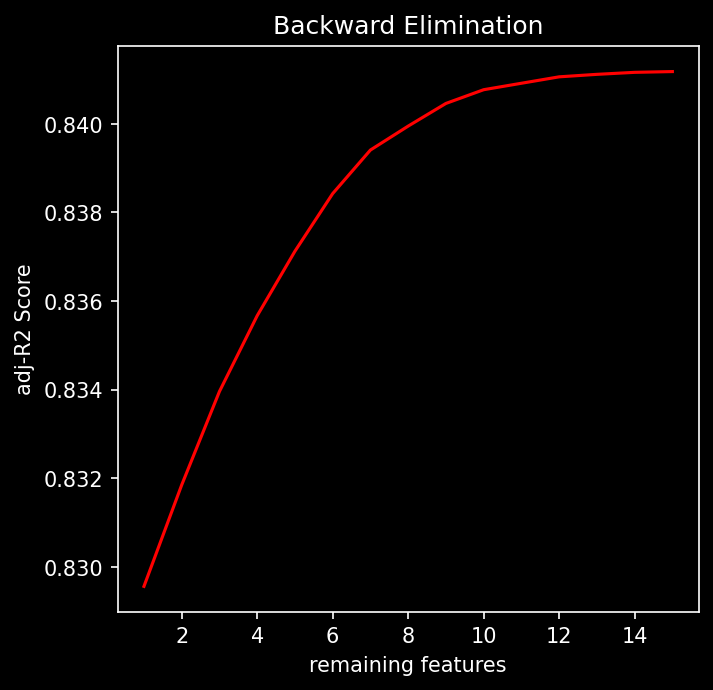

In [24]:
plt.figure(figsize = (5,5), dpi = 150)
plt.plot(range(len(history),0,-1), history, color = 'red')
plt.xlabel('remaining features')
plt.ylabel('adj-R2 Score')
#plt.yticks([z/100 for z in range()])
plt.title('Backward Elimination')